# 第六次作业\_2\_7.6

> 新雅62/CDIE6
> 2016013327 项雨桐

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KernelDensity as KD
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
pos = np.random.normal(loc=-2.5,scale=1,size=250)
neg = np.random.normal(loc=2.5,scale=2,size=250)

pos_train, pos_test = train_test_split(pos, test_size=0.30, random_state=30)
neg_train, neg_test = train_test_split(neg, test_size=0.30, random_state=30)

## 1. 高斯核下的非参数估计

In [3]:
model_pos = KD().fit(pos_train.reshape(-1,1))
model_neg = KD().fit(neg_train.reshape(-1,1))

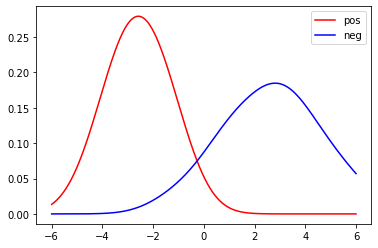

In [4]:
x = np.linspace(-6, 6, 1000).reshape(-1,1)
pos_log_dens = model_pos.score_samples(x)
neg_log_dens = model_neg.score_samples(x)

plt.plot(x, np.exp(pos_log_dens), 'r', label='pos')
plt.plot(x, np.exp(neg_log_dens), 'b', label='neg')
plt.legend()
plt.show()

In [5]:
def pos_prob(x):
    pos_log_dens = model_pos.score_samples(x)
    neg_log_dens = model_neg.score_samples(x)
    return np.exp(pos_log_dens)/(np.exp(pos_log_dens) + np.exp(neg_log_dens))
def neg_prob(x):
    pos_log_dens = model_pos.score_samples(x)
    neg_log_dens = model_neg.score_samples(x)
    return np.exp(neg_log_dens)/(np.exp(pos_log_dens) + np.exp(neg_log_dens))

In [6]:
all_test = np.concatenate((pos_test,neg_test)).reshape(-1,1)
all_true = np.concatenate((np.ones(75),np.zeros(75))).reshape(-1,1)

all_pos = pos_prob(all_test.reshape(-1,1))
all_neg = neg_prob(all_test.reshape(-1,1))

all_pred_err = [1 if pos > neg else 0 for (pos,neg) in zip(all_pos,all_neg)]
all_pred_risk = [1 if pos > 10*neg else 0 for (pos,neg) in zip(all_pos,all_neg)]

acc_err = accuracy_score(all_true, all_pred_err)
acc_risk = accuracy_score(all_true, all_pred_risk)

print("min error:",acc_err)
print("min risk:",acc_risk)

min error: 0.94
min risk: 0.8666666666666667


In [7]:
print(all_pred_err)
print(all_pred_risk)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
